In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets

%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
import warnings; 
warnings.filterwarnings('ignore')

import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy
# 使用沙盒数据，目的是和书中一样的数据环境
abupy.env.enable_example_env_ipython()

enable example env will only read RomDataBu/csv


# 第9章 量化系统-度量与优化

[abu量化系统github地址](https://github.com/bbfamily/abu) (您的star是我的动力！)

[abu量化文档教程ipython notebook](https://github.com/bbfamily/abu/tree/master/abupy_lecture)

## 9.1 度量的基本使用方法

In [2]:
from abupy import AbuFactorBuyBreak, AbuFactorAtrNStop, AbuFactorPreAtrNStop, AbuFactorCloseAtrNStop
from abupy import abu, ABuProgress, GridSearch, ABuFileUtil, ABuGridHelper, AbuMetricsBase, AbuBlockProgress
    
# 设置初始资金数
read_cash = 1000000
# 设置选股因子，None为不使用选股因子
stock_pickers = None
# 买入因子依然延用向上突破因子
buy_factors = [{'xd': 60, 'class': AbuFactorBuyBreak},
               {'xd': 42, 'class': AbuFactorBuyBreak}]

# 卖出因子继续使用上一章使用的因子
sell_factors = [
    {'stop_loss_n': 1.0, 'stop_win_n': 3.0,
     'class': AbuFactorAtrNStop},
    {'class': AbuFactorPreAtrNStop, 'pre_atr_n': 1.5},
    {'class': AbuFactorCloseAtrNStop, 'close_atr_n': 1.5}
]
# 择时股票池
choice_symbols = ['usNOAH', 'usSFUN', 'usBIDU', 'usAAPL', 'usGOOG',
                  'usTSLA', 'usWUBA', 'usVIPS']
# 使用run_loop_back运行策略
abu_result_tuple, kl_pd_manager = abu.run_loop_back(read_cash,
                                                   buy_factors,
                                                   sell_factors,
                                                   stock_pickers,
                                                   choice_symbols=
                                                   choice_symbols,
                                                   n_folds=2)
ABuProgress.clear_output()

买入后卖出的交易数量:67
买入后尚未卖出的交易数量:3
胜率:55.2239%
平均获利期望:14.1076%
平均亏损期望:-7.8008%
盈亏比:2.2102
策略收益: 48.3078%
基准收益: 15.0841%
策略年化收益: 24.1539%
基准年化收益: 7.5420%
策略买入成交比例:80.0000%
策略资金利用率比例:28.0706%
策略共执行504个交易日


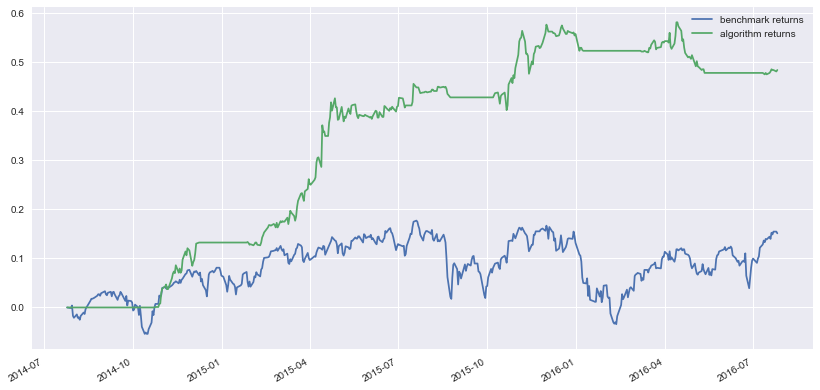

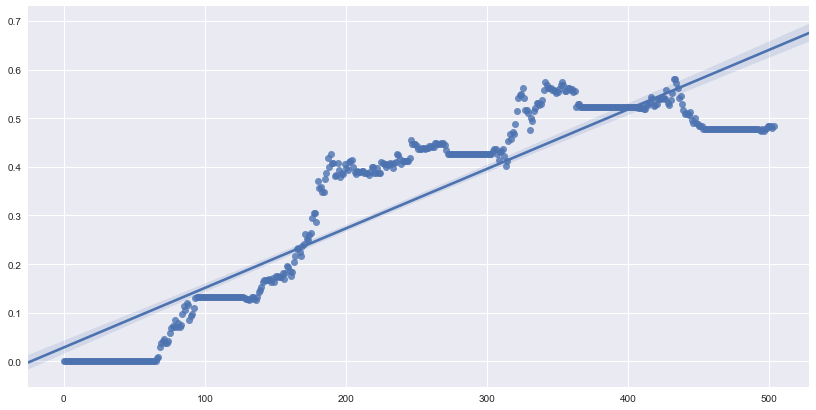

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


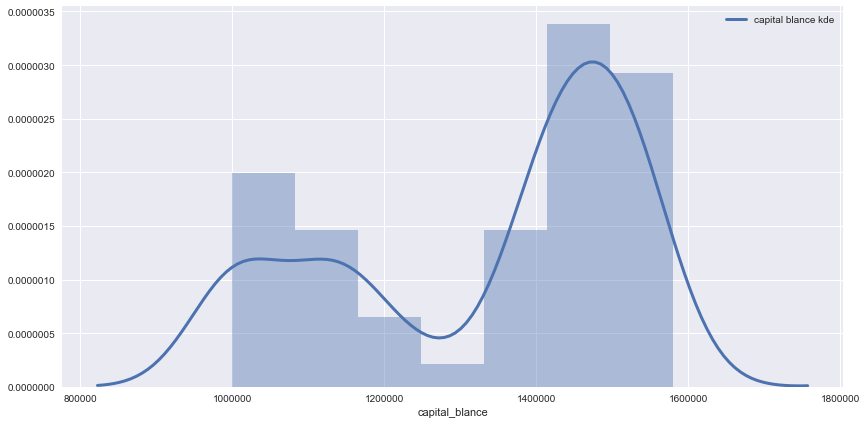

In [3]:
metrics = AbuMetricsBase(*abu_result_tuple)
metrics.fit_metrics()
metrics.plot_returns_cmp()

### 9.2 度量的基础

### 9.2.1 度量的基础概念

### 9.2.2 度量的可视化

alpha阿尔法:0.1899
beta贝塔:0.1594
Information信息比率:0.0423
策略Sharpe夏普比率: 1.8654
基准Sharpe夏普比率: 0.5012
策略波动率Volatility: 0.1090
基准波动率Volatility: 0.1689


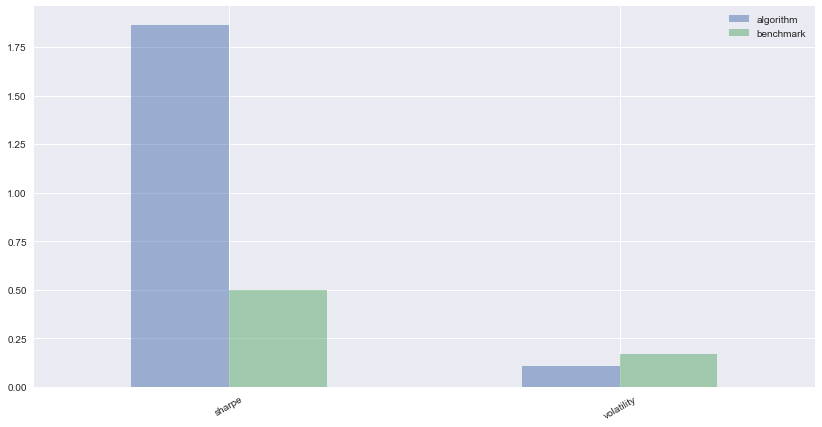

In [4]:
metrics.plot_sharp_volatility_cmp()

In [5]:
def sharpe(rets, ann=252):
    return rets.mean() / rets.std() * np.sqrt(ann)

print('策略sharpe值计算为＝{}'.format(sharpe(metrics.algorithm_returns)))

策略sharpe值计算为＝1.8654342813888194


因子平均生效间隔:16.710526315789473


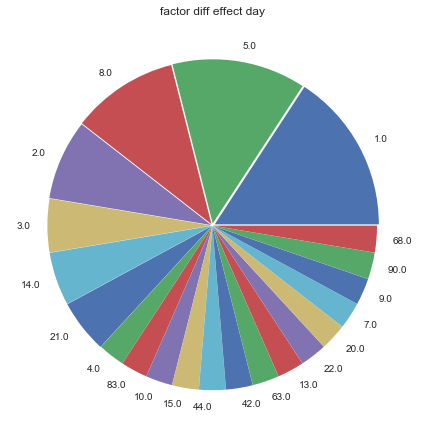

In [6]:
metrics.plot_effect_mean_day()

策略持股天数平均数: 112.029
策略持股天数中位数: 29.000


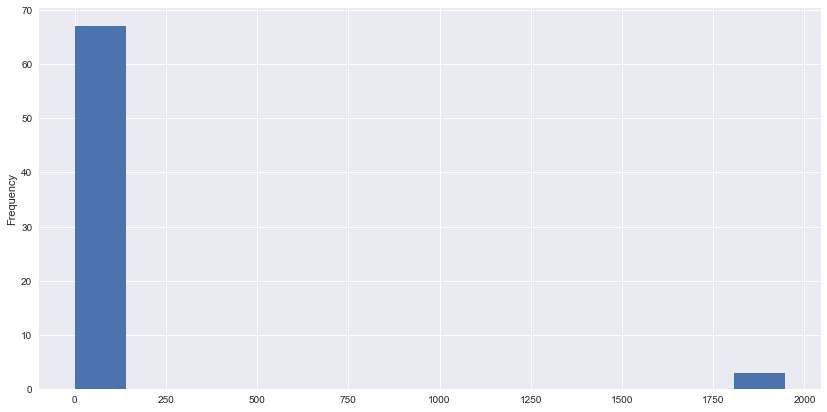

In [7]:
metrics.plot_keep_days()

卖出择时生效因子分布：
AbuFactorAtrNStop:stop_loss=1.0           18
AbuFactorAtrNStop:stop_win=3.0             9
AbuFactorCloseAtrNStop:close_atr_n=1.5    31
AbuFactorPreAtrNStop:pre_atr=1.5           9
dtype: int64


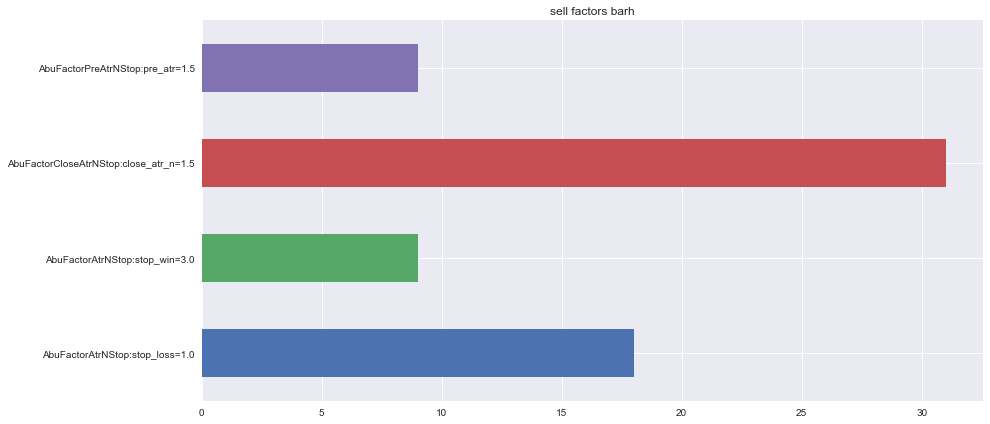

In [8]:
metrics.plot_sell_factors()

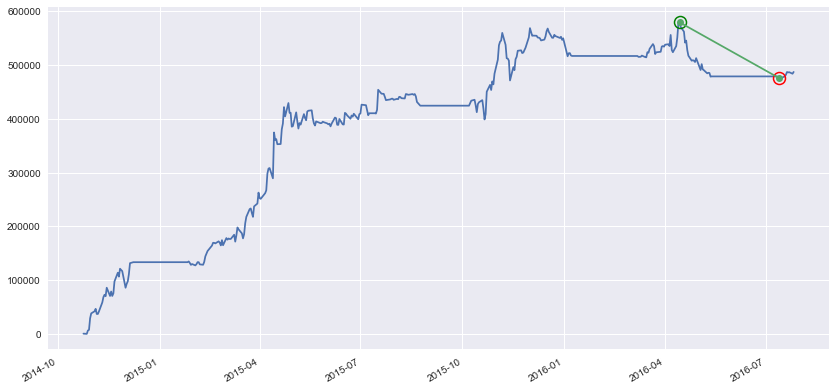

最大回撤: 0.065704
最大回测启始时间:2016-04-14, 结束时间2016-07-13, 共回测103775.665000


In [9]:
metrics.plot_max_draw_down()

## 9.3 基于grid search寻找因子最优参数

### 9.3.1 参数取值范围

In [10]:
stop_win_range = np.arange(2.0, 4.5, 0.5)
stop_loss_range = np.arange(0.5, 2, 0.5)

sell_atr_nstop_factor_grid = {
              'class': [AbuFactorAtrNStop],
              'stop_loss_n'   : stop_loss_range,
              'stop_win_n'   : stop_win_range
         }

print('止盈参数stop_win_n设置范围:{}'.format(stop_win_range))
print('止损参数stop_loss_n设置范围:{}'.format(stop_loss_range))

止盈参数stop_win_n设置范围:[ 2.   2.5  3.   3.5  4. ]
止损参数stop_loss_n设置范围:[ 0.5  1.   1.5]


In [11]:
close_atr_range = np.arange(1.0, 4.0, 0.5)
pre_atr_range = np.arange(1.0, 3.5, 0.5)

sell_atr_pre_factor_grid = {
              'class': [AbuFactorPreAtrNStop],
              'pre_atr_n' : pre_atr_range
         }

sell_atr_close_factor_grid = {
              'class': [AbuFactorCloseAtrNStop],
              'close_atr_n' : close_atr_range
         }

print('暴跌保护止损参数pre_atr_n设置范围:{}'.format(pre_atr_range))
print('盈利保护止盈参数close_atr_n设置范围:{}'.format(close_atr_range))

暴跌保护止损参数pre_atr_n设置范围:[ 1.   1.5  2.   2.5  3. ]
盈利保护止盈参数close_atr_n设置范围:[ 1.   1.5  2.   2.5  3.   3.5]


### 9.3.2 参数进行排列组合

In [12]:
sell_factors_product = ABuGridHelper.gen_factor_grid(
    ABuGridHelper.K_GEN_FACTOR_PARAMS_SELL,
    [sell_atr_nstop_factor_grid, sell_atr_pre_factor_grid, sell_atr_close_factor_grid])

print('卖出因子参数共有{}种组合方式'.format(len(sell_factors_product)))
print('卖出因子组合0形式为{}'.format(sell_factors_product[0]))

卖出因子参数共有476种组合方式
卖出因子组合0形式为[{'class': <class 'abupy.FactorSellBu.ABuFactorAtrNStop.AbuFactorAtrNStop'>, 'stop_loss_n': 0.5, 'stop_win_n': 2.0}, {'class': <class 'abupy.FactorSellBu.ABuFactorPreAtrNStop.AbuFactorPreAtrNStop'>, 'pre_atr_n': 1.0}, {'class': <class 'abupy.FactorSellBu.ABuFactorCloseAtrNStop.AbuFactorCloseAtrNStop'>, 'close_atr_n': 1.0}]


In [13]:
buy_bk_factor_grid1 = {
    'class': [AbuFactorBuyBreak],
    'xd': [42]
}

buy_bk_factor_grid2 = {
    'class': [AbuFactorBuyBreak],
    'xd': [60]
}

buy_factors_product = ABuGridHelper.gen_factor_grid(
    ABuGridHelper.K_GEN_FACTOR_PARAMS_BUY, [buy_bk_factor_grid1, buy_bk_factor_grid2])

print('买入因子参数共有{}种组合方式'.format(len(buy_factors_product)))
print('买入因子组合形式为{}'.format(buy_factors_product))

买入因子参数共有3种组合方式
买入因子组合形式为[[{'class': <class 'abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak'>, 'xd': 42}, {'class': <class 'abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak'>, 'xd': 60}], [{'class': <class 'abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak'>, 'xd': 42}], [{'class': <class 'abupy.FactorBuyBu.ABuFactorBuyBreak.AbuFactorBuyBreak'>, 'xd': 60}]]


### 9.3.3 GridSearch寻找最优参数

In [14]:
read_cash = 1000000
choice_symbols = ['usNOAH', 'usSFUN', 'usBIDU', 'usAAPL', 'usGOOG',
                  'usTSLA', 'usWUBA', 'usVIPS']
grid_search = GridSearch(read_cash, choice_symbols,
                         buy_factors_product=buy_factors_product,
                         sell_factors_product=sell_factors_product)

下面开始通过fit函数开始寻找最优，第一次运行select：run gird search，然后点击run select，如果已经运行过可select：load score cache直接从缓存数据读取

备注：如果第一次运行选择run gird search下面的运行耗时大约1小时多，建议电脑空闲时运行

In [15]:
scores = None
score_tuple_array = None

def run_grid_search():
    global scores, score_tuple_array
    # 运行GridSearch n_jobs=-1启动cpu个数的进程数
    scores, score_tuple_array = grid_search.fit(n_jobs=-1)
    # 运行完成输出的score_tuple_array可以使用dump_pickle保存在本地，以方便之后使用
    ABuFileUtil.dump_pickle(score_tuple_array, '../gen/score_tuple_array')

def load_score_cache():
    """有本地数据score_tuple_array后，即可以从本地缓存读取score_tuple_array"""
    global scores, score_tuple_array
    
    with AbuBlockProgress('load score cache'):
        score_tuple_array = ABuFileUtil.load_pickle('../gen/score_tuple_array')
        if not hasattr(grid_search, 'best_score_tuple_grid'):
            # load_pickle的grid_search没有赋予best_score_tuple_grid，这里补上
            from abupy import make_scorer, WrsmScorer
            scores = make_scorer(score_tuple_array, WrsmScorer)
            grid_search.best_score_tuple_grid = score_tuple_array[scores.index[-1]]
        
def select(select):
    if select == 'run gird search':
        run_grid_search()
    else: # load score cache
        load_score_cache()

_ = ipywidgets.interact_manual(select, select=['run gird search', 'load score cache'])

C:\ProgramData\Anaconda3\lib\site-packages\ipywidgets\widgets\widget.py:494: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  self.log.warn(message)
Widget Javascript not detected.  It may not be installed or enabled properly.


In [16]:
print('组合因子参数数量{}'.format(len(buy_factors_product) * len(sell_factors_product) ))
# 如果从本地序列文件中读取则没有scores
print('最终评分结果数量{}'.format(len(scores)))

组合因子参数数量1428


TypeError: object of type 'NoneType' has no len()

In [ ]:
best_score_tuple_grid = grid_search.best_score_tuple_grid
AbuMetricsBase.show_general(best_score_tuple_grid.orders_pd, best_score_tuple_grid.action_pd,
                                        best_score_tuple_grid.capital, best_score_tuple_grid.benchmark)

### 9.3.4 度量结果的评分

In [ ]:
from abupy import WrsmScorer
# 实例化一个评分类WrsmScorer，它的参数为之前GridSearch返回的score_tuple_array对象
scorer = WrsmScorer(score_tuple_array)

In [ ]:
scorer.score_pd.tail()

In [ ]:
# score_tuple_array[658]与grid_search.best_score_tuple_grid是一致的
sfs = scorer.fit_score()
# 打印前15个高分组合
sfs[::-1][:15]

### 9.3.5 不同权重的评分

In [ ]:
# 实例化WrsmScorer，参数weights，只有第二项为1，其他都是0，
# 代表只考虑投资回报来评分
scorer = WrsmScorer(score_tuple_array, weights=[0, 1, 0, 0])
# 返回排序后的队列
scorer_returns_max = scorer.fit_score()
# 因为是倒序排序，所以index最后一个为最优参数
best_score_tuple_grid = score_tuple_array[scorer_returns_max.index[-1]]
# 由于篇幅，最优结果只打印文字信息
AbuMetricsBase.show_general(best_score_tuple_grid.orders_pd,
                            best_score_tuple_grid.action_pd,
                            best_score_tuple_grid.capital,
                            best_score_tuple_grid.benchmark,
                            only_info=True)

In [ ]:
# 最后打印出只考虑投资回报下最优结果使用的买入策略和卖出策略
best_score_tuple_grid.buy_factors, best_score_tuple_grid.sell_factors

In [ ]:
# 只有第一项为1，其他都是0代表只考虑胜率来评分
scorer = WrsmScorer(score_tuple_array, weights=[1, 0, 0, 0])
# 返回按照评分排序后的队列
scorer_returns_max = scorer.fit_score()
# index[-1]为最优参数序号
best_score_tuple_grid = score_tuple_array[scorer_returns_max.index[-1]]
AbuMetricsBase.show_general(best_score_tuple_grid.orders_pd,
                            best_score_tuple_grid.action_pd,
                            best_score_tuple_grid.capital,
                            best_score_tuple_grid.benchmark,
                            only_info=False)

# 最后打印出只考虑胜率下最优结果使用的买入策略和卖出策略
best_score_tuple_grid.buy_factors, best_score_tuple_grid.sell_factors


## 9.4 资金限制对度量的影响

关闭沙盒数据环境

如下内容即不能使用沙盒环境, 建议对照阅读*abu量化文档－第十九节* 以及之后的内容

In [ ]:
abupy.env.disable_example_env_ipython()

from abupy import AbuMetricsBase, AbuFactorCloseAtrNStop, AbuFactorPreAtrNStop, AbuFactorAtrNStop, AbuFactorBuyBreak
from abupy import abu, EMarketDataFetchMode, EMarketTargetType, EStoreAbu, EMarketSourceType, EDataCacheType, ABuProgress
import ipywidgets

所有获取的数据已经存放在百度云盘上，后面的章节使用的数据都是本节更新的数据，建议直接从云盘下载入库完毕的数据库，不需要从各个数据源再一个一个的下载数据进行入库，百度云地址如下：

[csv格式美股，A股，港股，币类，期货6年日k数据](https://pan.baidu.com/s/1geNZgqf) 密码: gvtr

下面数据存贮格式为hdf5数据，由于hdf5文件解压后非常大，还需要区分python版本，所以如果没有足够的存贮空间
特别是python2下，建议使用csv格式的缓存文件：

[mac系统python3 美股，A股，港股，币类，期货6年日k数据](https://pan.baidu.com/s/1o8sldNk) 密码: ecyp

[mac系统python2 A股6年日k数据: ](https://pan.baidu.com/s/1bptn25h) 密码: sid8

[mac系统python2 美股6年日k数据: ](https://pan.baidu.com/s/1geHR9Lp) 密码: uaww

[windows python3 美股，A股，港股，币类，期货6年日k数据](https://pan.baidu.com/s/1bzeVHO) 密码: 3cwe

[windows python2 A股6年日k数据: ](https://pan.baidu.com/s/1skZOe7N) 密码: 78mb

[windows python2 美股6年日k数据: ](https://pan.baidu.com/s/1i5MNzKx) 密码: 63r3

下载完毕上述数据后，hdf5解压得到df_kl.h5文件，csv解压得到csv文件夹，解压后放到下面路径下即可

In [ ]:
if abupy.env.g_is_mac_os:
    !open $abupy.env.g_project_data_dir
else:
    !echo $abupy.env.g_project_data_dir

如果不想通过直接下载数据文件的方式，也可下面通过切换至腾讯数据源，然后进行美股数据全市场更新：

备注：耗时操作，大概需要运行15分钟左右，可以在做其它事情的时候运行

In [ ]:
def tx_us():
    abupy.env.g_market_source = EMarketSourceType.E_MARKET_SOURCE_tx
    abupy.env.g_data_cache_type = EDataCacheType.E_DATA_CACHE_CSV
    abu.run_kl_update(start='2011-08-08', end='2017-08-08', market=EMarketTargetType.E_MARKET_TARGET_US, n_jobs=10)

# 避免使用notebook运行run all时运行不想执行的代码
_ = ipywidgets.interact_manual(tx_us)

买入因子，卖出因子等依然使用相同的设置，如下所示：

In [ ]:
# 初始化资金500万
read_cash = 5000000

# 买入因子依然延用向上突破因子
buy_factors = [{'xd': 60, 'class': AbuFactorBuyBreak},
               {'xd': 42, 'class': AbuFactorBuyBreak}]

# 卖出因子继续使用上一节使用的因子
sell_factors = [
    {'stop_loss_n': 1.0, 'stop_win_n': 3.0,
     'class': AbuFactorAtrNStop},
    {'class': AbuFactorPreAtrNStop, 'pre_atr_n': 1.5},
    {'class': AbuFactorCloseAtrNStop, 'close_atr_n': 1.5}
]

将数据读取模式设置为本地数据模式，即进行全市场回测时最合适的模式，运行效率高，且分类数据更新和交易回测。

In [ ]:
abupy.env.g_data_fetch_mode = EMarketDataFetchMode.E_DATA_FETCH_FORCE_LOCAL

下面将回测市场设置为美股市场：

In [ ]:
abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_US

下面通过env中的设置将回测中的symbols切分为回测训练集与回测测试集，且打开回测生成买入时刻特征开关：

In [ ]:
# 回测时生成买入时刻特征
abupy.env.g_enable_ml_feature = True
# 回测时将symbols切割分为训练集数据和测试集两份，使用训练集进行回测
abupy.env.g_enable_train_test_split = True

下面设置回测时切割训练集，测试集使用的切割比例参数，默认为10，即切割为10份，9份做为训练，1份做为测试，由于美股股票数量多，所以切割分为4份，3份做为训练集，1份做为测试集：

In [ ]:
abupy.env.g_split_tt_n_folds = 4

资金管理依然使用默认atr，每笔交易的买入基数资金设置为万分之20，这个值如果设置太大，比如初始默认的0.1的话，将会导致太多的股票由于资金不足无法买入，丧失全市场回测的意义，如果太小的话又会导致资金利用率下降，导致最终收益下降：

更多资金管理请阅读相关源代码或《量化交易之路》中相关内容

In [ ]:
# 每笔交易的买入基数资金设置为万分之15
abupy.beta.atr.g_atr_pos_base = 0.0015

在上面run_kl_update中更新了从2011-08-08至2017-08-08，由于在买入时刻生成特征，所以要保留一年的数据做为特征数据回测时段，所以下面的回测start使用2012-08-08至2017-08-08，即向后推了一年做回测：

下面开始回测，第一次运行select：run loop back，然后点击run select，如果已经回测过可select：load train data直接从缓存数据读取：

In [ ]:
abu_result_tuple = None
def run_loop_back():
    global abu_result_tuple
    abu_result_tuple, _ = abu.run_loop_back(read_cash,
                                                   buy_factors,
                                                   sell_factors,
                                                   choice_symbols=None,
                                                   start='2012-08-08', end='2017-08-08', n_process_pick=5)
    # 把运行的结果保存在本地，以便之后分析回测使用，保存回测结果数据代码如下所示
    abu.store_abu_result_tuple(abu_result_tuple, n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, 
                               custom_name='train_us')
    ABuProgress.clear_output()

def run_load_train():
    global abu_result_tuple
    abu_result_tuple = abu.load_abu_result_tuple(n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, 
                                                 custom_name='train_us')

def select(select):
    if select == 'run loop back':
        run_loop_back()
    else:
        run_load_train()

_ = ipywidgets.interact_manual(select, select=['run loop back', 'load train data'])

下面从回测结果action_pd.deal中可以看到由于很多时候资金不足，导致大约只有1/3的单子成交：

In [ ]:
abu_result_tuple.action_pd.deal.value_counts()

使用AbuMetricsBase度量结果，从metrics.plot_returns_cmp()函数度量输出中显示，策略买入成交比例为31.7084%：

In [ ]:
metrics_train = AbuMetricsBase.show_general(*abu_result_tuple, only_show_returns=True)

下面通过env中设置使用刚才切分的测试集美股symbol，它使用pickle读取之前已经切割好的本地化测试集股票代码序列：

In [ ]:
# 回测时使用切割好的测试数据
abupy.env.g_enable_last_split_test = True

提高g_atr_pos_base为0.007（因为默认切割训练集与测试集数据比例为4:1，所以提高g_atr_pos_base为之前的大概3-5倍都可以：

In [ ]:
abupy.beta.atr.g_atr_pos_base = 0.007

下面开始回测，第一次运行select：run loop back，然后点击run select_test，如果已经回测过可select：load test data直接从缓存数据读取：

In [ ]:
abu_result_tuple_test = None
def run_loop_back_test():
    global abu_result_tuple_test
    abu_result_tuple_test, _ = abu.run_loop_back(read_cash,
                                                 buy_factors,
                                                 sell_factors,
                                                 choice_symbols=None,
                                                 start='2012-08-08', end='2017-08-08')
    # 把运行的结果保存在本地，以便之后分析回测使用，保存回测结果数据代码如下所示
    abu.store_abu_result_tuple(abu_result_tuple_test, n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, 
                               custom_name='test_us')
    ABuProgress.clear_output()

def run_load_test():
    global abu_result_tuple_test
    abu_result_tuple_test = abu.load_abu_result_tuple(n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, 
                                                 custom_name='test_us')

def select_test(select):
    if select == 'run loop back':
        run_loop_back_test()
    else:
        run_load_test()

_ = ipywidgets.interact_manual(select_test, select=['run loop back', 'load test data'])

使用AbuMetricsBase度量结果, 测试集策略买入成交比例为20.8674%：

In [ ]:
metrics_test = AbuMetricsBase.show_general(*abu_result_tuple_test, only_show_returns=True)

## 满仓乘数

《量化交易之路》中通过把初始资金扩大到非常大，但是每笔交易的买入基数却不增高，来使交易全部都成交，再使用满仓乘数的示例，由于需要再次进行全市场回测，比较耗时，下面直接示例通过AbuMetricsBase中的transform_to_full_rate_factor接口将之前的回测结果转换为使用大初始资金回测的结果：


第一次运行select：transform，然后点击run select_full，如果已经运行过可select：load直接从缓存数据读取：

备注：即使不重新做全市场回测，由于设计所有交易单的重新计算，所有仍然需要时间，下面操作属于耗时操作

In [ ]:
test_frm = None
def run_transform():
    global test_frm
    test_frm = metrics_test.transform_to_full_rate_factor(n_process_kl=4, show=False)
    
    # 转换后保存起来，下次直接读取，不用再转换了
    from abupy import AbuResultTuple
    test_us_fr = AbuResultTuple(test_frm.orders_pd, test_frm.action_pd, test_frm.capital, test_frm.benchmark)
    abu.store_abu_result_tuple(test_us_fr, n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, 
                               custom_name='test_us_full_rate')

def run_load():
    global test_frm
    test_us_fr = abu.load_abu_result_tuple(n_folds=5, store_type=EStoreAbu.E_STORE_CUSTOM_NAME, 
                                           custom_name='test_us_full_rate')
    # 本地读取后使用AbuMetricsBase构造度量对象，参数enable_stocks_full_rate_factor=True, 即使用满仓乘数
    test_frm = AbuMetricsBase(test_us_fr.orders_pd, test_us_fr.action_pd, test_us_fr.capital, test_us_fr.benchmark,
                              enable_stocks_full_rate_factor=True)
    test_frm.fit_metrics()

def select_full(select):
    if select == 'transform':
        run_transform()
    else:
        run_load()

_ = ipywidgets.interact_manual(select_full, select=['transform', 'load'])

使用test_frm进行度量结果可以看到所有交易都顺利成交了，策略买入成交比例:100.0000%，但资金利用率显然过低，它导致基准收益曲线和策略收益曲线不在一个量级上，无法有效的进行对比：

In [ ]:
AbuMetricsBase.show_general(test_frm.orders_pd, 
                            test_frm.action_pd, test_frm.capital, test_frm.benchmark, only_show_returns=True)

转换出来的test_frm即是一个使用满仓乘数的度量对象，下面使用test_frm直接进行满仓度量即可：

In [ ]:
print(type(test_frm))
test_frm.plot_returns_cmp(only_show_returns=True)

如果不需要与基准进行对比，最简单的方式是使用plot_order_returns_cmp()函数，之后章节‘第11章-量化系统-机器学习•ABU’会使用plot_order_returns_cmp()度量对比开启裁判系统和未开启裁判系统的交易结果：

In [ ]:
# 如果不需要与基准进行对比，最简单的方式是使用plot_order_returns_cmp
metrics_test.plot_order_returns_cmp()

_____

## 其它市场的回测

### A股市场训练集交易回测

**请阅读abu量化文档相关章节**